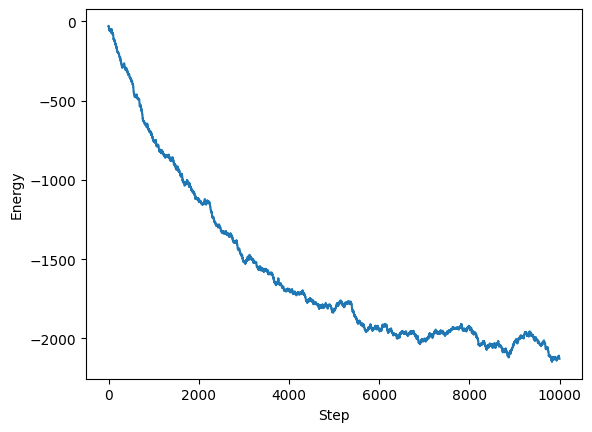

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N, T, num_steps = 64, 4, 10000


def ising_model_2D(N, T, num_steps):
    # Initialize a 2D lattice of N x N spins
    lattice = np.random.choice([-1, 1], size=(N, N))
    
    # Define the energy function
    def energy(spin):
        return -np.sum(
            spin * (np.roll(spin, -1, axis=0) + np.roll(spin, -1, axis=1))
        )
        
    # Define the Metropolis algorithm
    def metropolis(spin, T):
        i, j = np.random.randint(N, size=2)
        delta_E = 2 * spin[i, j] * (
            spin[(i-1)%N, j] + spin[(i+1)%N, j] + 
            spin[i, (j-1)%N] + spin[i, (j+1)%N]
        )
        if delta_E < 0 or np.exp(-delta_E / T) > np.random.rand():
            spin[i, j] *= -1
    
    # Run the simulation
    energies = np.zeros(num_steps)
    for step in range(num_steps):
        metropolis(lattice, T)
        energies[step] = energy(lattice)
    
    # Plot the results
    plt.plot(energies)
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.show()

# Example usage
ising_model_2D(N, T, num_steps)
